# ANN

Test the ANN algorithm from *K. P. Amber, R. Ah-mad, M. W. Aslam, A. Kousar, M. Usman, and M. S. Khan*. 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import tensorflow libraries for ANN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

# import sklearn libraries for regression performance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [3]:
df = pd.read_csv('BANES_weather_merged.csv', parse_dates=['time']).groupby(['time', 'location', 'postcode']).mean().reset_index()
df.head()


,time,location,postcode,energy,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco
0,2006-10-01 00:30:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,32.8,14.95,13.80,93.0,0.0,0.0,175.0,13.9,NaN,1001.8,NaN
1,2006-10-01 01:00:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,33.0,14.80,13.50,92.0,0.0,0.0,180.0,14.8,NaN,1001.7,NaN
2,2006-10-01 01:30:00,Bath Central Library Electricity (HH),BA1 5AL,5.9,14.75,13.35,91.5,0.0,0.0,180.0,13.9,NaN,1001.7,NaN
3,2006-10-01 01:30:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,32.7,14.75,13.35,91.5,0.0,0.0,180.0,13.9,NaN,1001.7,NaN
4,2006-10-01 02:00:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,32.2,14.70,13.20,91.0,0.0,0.0,180.0,13.0,NaN,1001.7,NaN


In [41]:
def build_ann(input_shape, output_shape):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=input_shape))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=output_shape, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
    return model


def fit(model: Sequential, x_train, y_train, x_test, y_test, epochs=100, batch_size=32):
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
              validation_data=(x_test, y_test))
    return model


def evaluate(model, x_test, y_test):
    loss, mae, mse = model.evaluate(x_test, y_test)
    print('Test loss:', loss)
    print('Test mae:', mae)
    print('Test mse:', mse)


def predict(model, x_test):
    y_pred = model.predict(x_test)
    return y_pred


def performance(y_test, y_pred):
    print('Test mse:', mean_squared_error(y_test, y_pred))
    print('Test rmse:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('Test mae:', mean_absolute_error(y_test, y_pred))
    print('Test r2:', r2_score(y_test, y_pred))


def plot_prediction(y_test, y_pred):
    plt.figure(figsize=(10, 5))
    
    plt.scatter(y_test, y_pred, color='blue')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('ANN Prediction')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.show()


## ANN 1

ANN with only one location.

In [42]:
# location with highest number of observations
loc = df.groupby('location').count().sort_values(by='time', ascending=False).head(1)
(loc := loc.reset_index().iloc[0]['location'])

'Guildhall Electricity Supply 1 (HH)'

In [43]:
df_copy = df[df['location'] == loc]

df_copy.head()


,time,location,postcode,energy,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco
0,2006-10-01 00:30:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,32.8,14.95,13.80,93.0,0.0,0.0,175.0,13.9,NaN,1001.8,NaN
1,2006-10-01 01:00:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,33.0,14.80,13.50,92.0,0.0,0.0,180.0,14.8,NaN,1001.7,NaN
3,2006-10-01 01:30:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,32.7,14.75,13.35,91.5,0.0,0.0,180.0,13.9,NaN,1001.7,NaN
4,2006-10-01 02:00:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,32.2,14.70,13.20,91.0,0.0,0.0,180.0,13.0,NaN,1001.7,NaN
5,2006-10-01 02:30:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,31.3,14.55,13.15,91.5,0.0,0.0,180.0,11.2,NaN,1001.6,NaN


In [44]:
df_copy = df_copy[['energy', 'temp', 'rhum', 'pres']]
df_copy.head()


,energy,temp,rhum,pres
0,32.8,14.95,93.0,1001.8
1,33.0,14.80,92.0,1001.7
3,32.7,14.75,91.5,1001.7
4,32.2,14.70,91.0,1001.7
5,31.3,14.55,91.5,1001.6


In [45]:
# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(df_copy.drop(['energy'], axis=1), df_copy['energy'], test_size=0.2, random_state=42)

# validation data
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.25, random_state=42)


In [46]:
model1 = build_ann(x_train.shape[1:], 1)


In [47]:
model1.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                256       
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________


In [48]:
model1.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/100
3834/3834 [==============================] - 13s 3ms/step - loss: 111.3742 - mae: 8.5060 - mse: 111.3742 - val_loss: 118.0852 - val_mae: 9.3329 - val_mse: 118.0852
Epoch 2/100
3834/3834 [==============================] - 12s 3ms/step - loss: 107.8005 - mae: 8.3676 - mse: 107.8005 - val_loss: 105.5080 - val_mae: 8.0728 - val_mse: 105.5080
Epoch 3/100
3834/3834 [==============================] - 12s 3ms/step - loss: 106.3959 - mae: 8.3178 - mse: 106.3959 - val_loss: 106.9548 - val_mae: 8.0513 - val_mse: 106.9548
Epoch 4/100
3834/3834 [==============================] - 13s 3ms/step - loss: 104.5705 - mae: 8.2535 - mse: 104.5705 - val_loss: 109.9081 - val_mae: 8.8739 - val_mse: 109.9081
Epoch 5/100
3834/3834 [==============================] - 14s 4ms/step - loss: 103.7074 - mae: 8.2234 - mse: 103.7074 - val_loss: 106.3800 - val_mae: 8.0458 - val_mse: 106.3800
Epoch 6/100
3834/3834 [==============================] - 13s 4ms/step - loss: 102.7894 - mae: 8.1828 - mse: 102.7894 - v

In [50]:
# evaluate model
evaluate(model1, x_test, y_test)


240/240 [==============================] - 0s 2ms/step - loss: 101.8804 - mae: 8.1145 - mse: 101.8804
Test loss: 101.88043975830078
Test mae: 8.114540100097656
Test mse: 101.88043975830078


In [51]:
# predict
y_pred = predict(model1, x_test)


In [52]:
# performance
performance(y_test, y_pred)


Test mse: 101.88045733704723
Test rmse: 10.093584959619017
Test mae: 8.11454054908459
Test r2: 0.029574083624676506


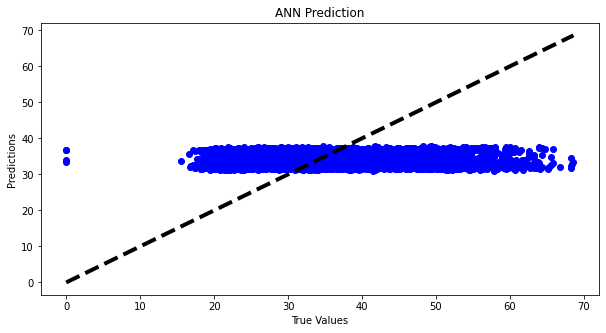

In [53]:
# plot prediction
plot_prediction(y_test, y_pred)
